In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
df=pd.read_csv('Cleaned_Algerian_forest_fires_database.csv')

In [100]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [101]:
#Dropping 'day','month' and 'year' as they are not required for predicting the ouput
df.drop(['day','month','year'],axis=1,inplace=True)

In [102]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [103]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [104]:
#Converting not fire into 0s and fire into 1s in Classes
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [105]:
df['Classes'].unique()

array([0, 1])

In [106]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [107]:
X=df.drop('FWI',axis=1)
Y=df['FWI']

In [108]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [109]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [110]:
Y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=42)

In [112]:
X_train.shape,X_test.shape

((170, 11), (73, 11))

<Axes: >

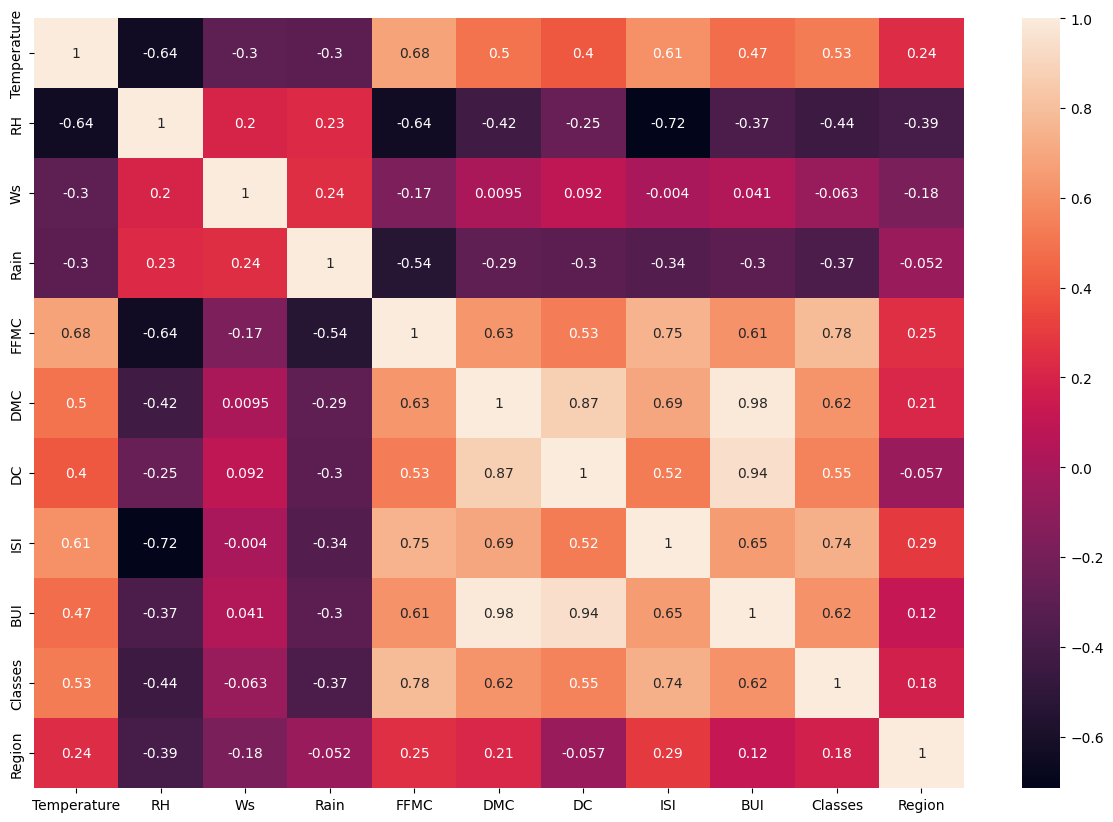

In [113]:
# Heatmap visualization of X_train
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [114]:

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [115]:
corr_features=correlation(X_train,0.90)
corr_features

{'BUI'}

### BUI has correlation more then 90% and thus gets dropped (given the threshold value is 0.90)

In [116]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [117]:
X_train.shape ,X_test.shape

((170, 10), (73, 10))

In [118]:
# Standardizing the X_train and X_test
from sklearn.preprocessing import StandardScaler
Scalar=StandardScaler()
X_train_scaled=Scalar.fit_transform(X_train)
X_test_scaled=Scalar.transform(X_test)

#### Visualizing the X_train before and after Standardization

Text(0.5, 1.0, 'X_train After Scaling')

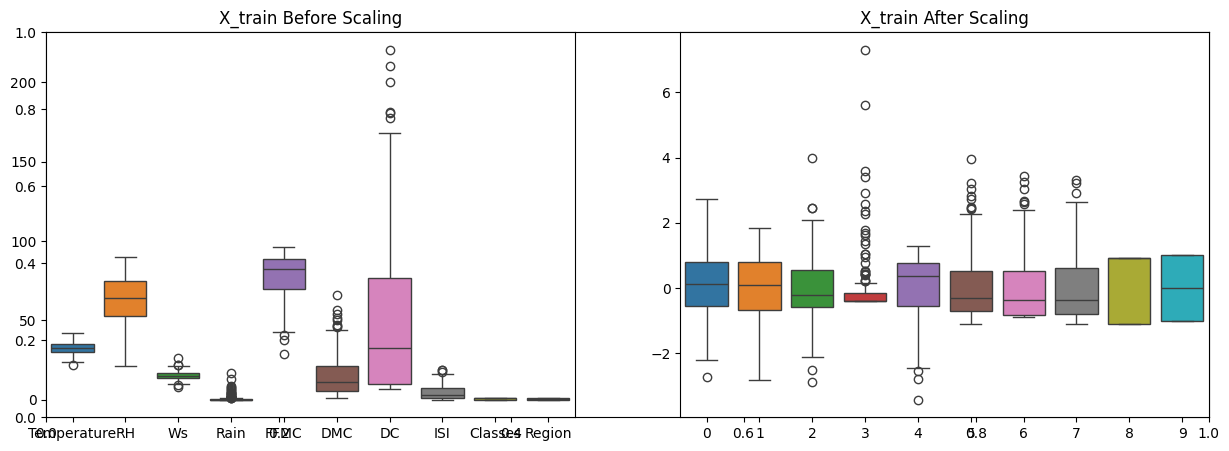

In [119]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Model Training

Mean absolute error:  0.5261552020018978
R2 Score:  0.9841998413069876


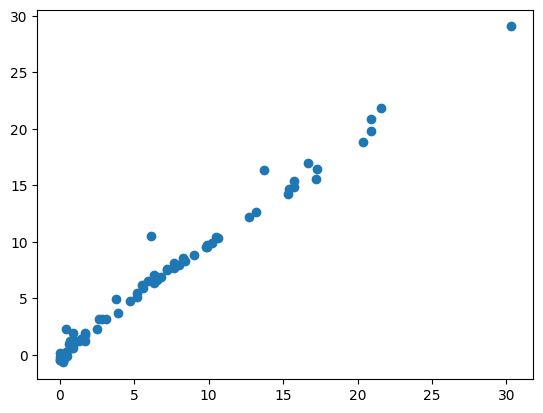

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Linear=LinearRegression()
Linear.fit(X_train_scaled,Y_train)
y_pred=Linear.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2 Score: ',score)
plt.scatter(Y_test,y_pred)

### Lasso Regression

Mean absolute error:  1.1136496839072072
R2 Score:  0.9519459873882713


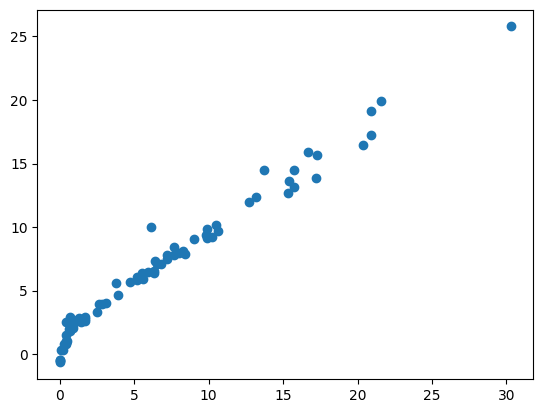

In [123]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,Y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2 Score: ',score)
plt.scatter(Y_test,y_pred)

### Ridge Regression

Mean absolute error:  0.5377544604364127
R2 Score:  0.9835261160567872


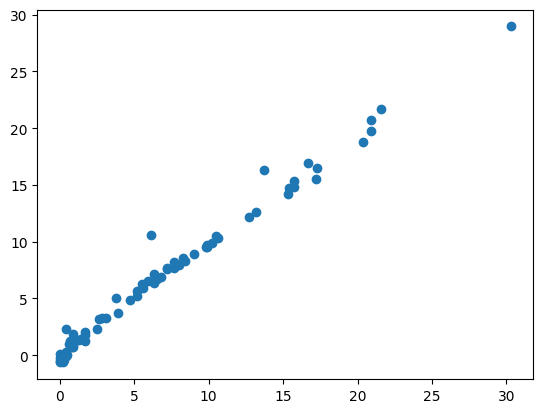

In [124]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,Y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2 Score: ',score)
plt.scatter(Y_test,y_pred)

### ElasticNet Regression

Mean absolute error:  1.7464263186360152
R2 Score:  0.8931120432486828


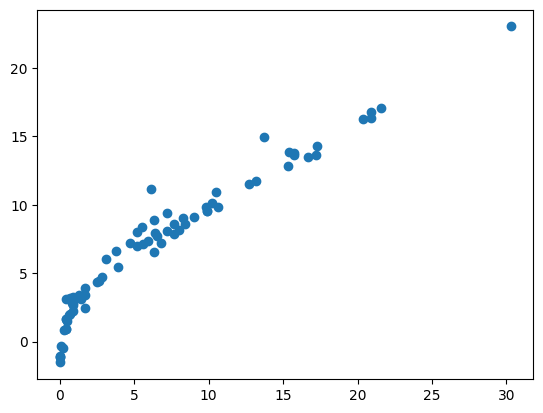

In [125]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Elastic=ElasticNet()
Elastic.fit(X_train_scaled,Y_train)
y_pred=Elastic.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2 Score: ',score)
plt.scatter(Y_test,y_pred)